In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
warnings.filterwarnings('ignore')


In [41]:
print(len(df_train))
print(len(df_test))

891
418


In [42]:
df_train.duplicated()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Training Accuracy: 0.8019662921348315
Validation Accuracy: 0.8100558659217877
Confusion Matrix:
 [[92 13]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



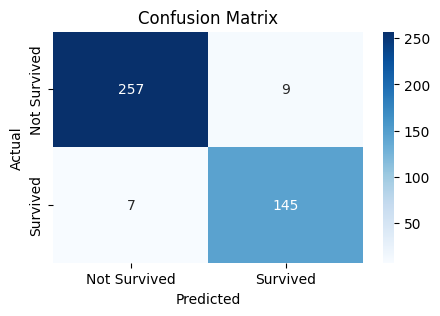

Submission file saved as 'submission.csv'


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 載入資料
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
df_gender_submission = pd.read_csv('titanic/gender_submission.csv')

# 資料預處理
def preprocess_data(df):
    # 填補缺失值
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # 轉換類別特徵
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # 刪除不必要的特徵
    df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

    return df

df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

# 特徵和目標變數
x = df_train.drop(columns=['Survived'])
y = df_train['Survived']

# 切分資料集
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 訓練模型
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# 預測
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)

# 評估模型
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))

# 對測試集進行預測
x_test = df_test.drop(columns=['Survived'], errors='ignore')
y_test_pred = model.predict(x_test)

# 載入測試集的真實標籤
y_test_true = df_gender_submission['Survived']

# 繪製混淆矩陣
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 儲存預測結果
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('titanic/test.csv')['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")